/Users/thiago/Extra/prj/scikit/env34/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


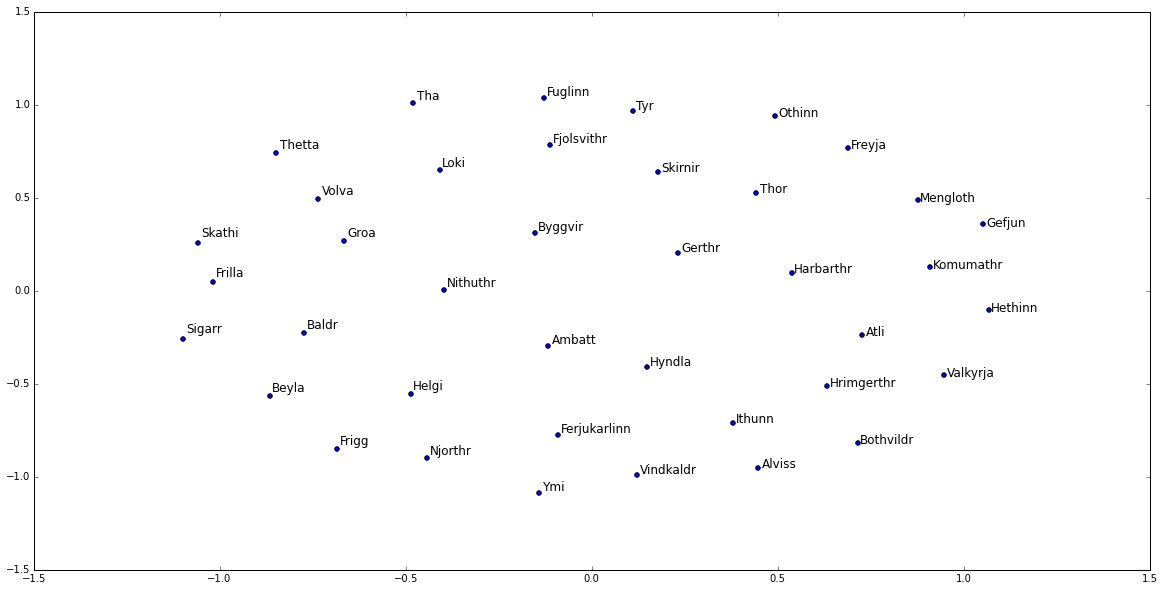

In [52]:
%matplotlib inline
from gensim.models.word2vec import Word2Vec
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
model = Word2Vec.load_word2vec_format('poe_repl_s100_i100_n5_mc5_w2.bin',
                                      binary=True)
model.init_sims(replace=True)
rcParams['figure.figsize'] = (20.0, 10.0)
craw = open('poe_chars.txt', 'r').readlines()
names = [n.strip() for n in craw]
vects = []
name_vects = []
for n in names:
    try:
        v = model[n]
    except KeyError:
        continue
    name_vects.append(n)
    vects.append(v)
    if 1:
        closest = model.most_similar(positive=[n])[:2]
        # print (n, closest)
        for c in closest:
            if c[1] > 0.5:
                vects.append(model[c[0]])
                name_vects.append(c[0])
mds = MDS(n_components=2, max_iter=500, n_init=10, dissimilarity='euclidean')
fvects = np.asfarray( vects, dtype='float' )
#pca = PCA(n_components=2)
#r = pca.fit_transform(fvects)
r = mds.fit_transform(fvects)
for i,p in enumerate(r):
    # print (name_vects[i], p)
    pass
plt.figure(figsize=(8,5))
fig, ax = plt.subplots()

plt.scatter(r[:,0],r[:,1])
shl = lambda k:(k[0]+0.01,k[1]+0.01-k[0]*0.02)
for i, v in enumerate(r):
    ax.annotate(name_vects[i].capitalize(), shl(v), size='large')

plt.show()
